### 背景
**会社**: [HomeCredit](https://www.homecredit.net/) => 1997年にチェコ共和国で設立され、オランダに本社を置く国際的なノンバンク金融機関。
10か国で事業を展開しており、主に信用履歴がほとんどまたはまったくない人々への分割払いに重点を置く。

**コンペ背景**: 信用履歴が少ない人はローンを簡単に組めず、怪しい金融行者に利用される鴨のようになってしまう。
銀行口座を持たない人々に、安心して借り入れをしてもらうために、電話番号や取引情報などの様々なデータを利用して、顧客の返済能力をKagglerの力を借りて予測 => 安全な借入体験を顧客に提供


In [1]:
# 標準
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option("max_rows", 500, "max_colwidth", 500, "max_columns", 500)
import matplotlib.pyplot as plt
%matplotlib inline

# from xfeat import SelectCategorical, SelectNumerical, Pipeline 使わずやってみる

# 前処理
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# モデル
from sklearn.linear_model import LogisticRegression

# 評価
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [2]:
# カラムデータ説明
pd.read_csv("/Volumes/ex-ssd/kaggle/data/home_default_risk/csv/HomeCredit_columns_description.csv", index_col=0)

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


### 特徴量メモ
#### ・カラム名: 説明 => 所感 or 気づき or 仮設
- SK_ID_CURR: ローン1つのに対するデータ
- TARGET: 1(返済が遅れたことのある、支払い困難な客), else 0 => 割合はどのくらいだろ？
- NAME_CONTRACT_TYPE: ローンのタイプ => ローンのこと全然分からん。。
- CODE_GENDER: 性別 => 年齢と組み合わせると良いかも
- FLAG_OWN_CAR: 車もっているか？ => 
- FLAG_OWN_REALTY: 家やマンションを保有してるか？ => 
- CNT_CHILDREN: 子供の数 => 子供いる家庭はしっかり返済してそう(偏見？)
- AMT_INCOME_TOTAL: 収入 => 重要そう(欠損してたら低収入かも)
- AMT_CREDIT: 借金のこと? => 
- AMT_ANNUITY: 年金？お年寄りとか
- AMT_GOODS_PRICE: ローンの対象となる商品価格 => **AMT_GOODS_PRICE / AMT_INCOME_TOTAL** が良い特徴量になりそう
- NAME_TYPE_SUITE: 誰か同席者がいたか？ => いる人は返済する傾向がありそう
- NAME_INCOME_TYPE: 収入タイプ =>
- NAME_EDUCATION_TYPE: 最高学歴 => 学歴高いほど返済する傾向がありそう。だけど奨学金の返済もあり厳しい可能性も
- NAME_FAMILY_STATUS: 家族構成?
- NAME_HOUSING_TYPE: 住居状況(賃貸、持ち家、同居など) => 持家と同居は返済しそう
- REGION_POPULATION_RELATIVE: 住んでいる地域の正規化された人口 => 少ないほど貧しい?? => 返済しない
- DAYS_BIRTH: 申し込み時の年齢 => 
- DAYS_EMPLOYED: 申し込みの何日前に仕事始めたか? => 
- DAYS_REGISTRATION: 申し込みの何日前に登録を変更したか？ => これ重要そう！！変更する人は怪しい??
- DAYS_ID_PUBLISH: 申し込みの何日前に本人確認書類を変更したか? => ↑と同じ
- OWN_CAR_AGE: 車の年齢(買ってからどのくらい経ってるか？)
- FLAG_MOBILE: 携帯電話番号提供したか？
- FLAG_EMP_PHONE: 会社の電話番号提供したか？
- FLAG_WORK_PHONE: 家の電話番号提供したか？
- FLAG_CONT_MOBILE: 携帯電話につながったか？
- FLAG_PHONE: FLAG_WORK_PHONEと一緒？
- FLAG_EMAIL: メアド提供したか？
- OCCUPATION_TYPE: 職業
- CNT_FAM_MEMBERS: 家族は何人か？
- REGION_RATING_CLIENT: 住んでいる地域に対する当社の評価 => ??
- REGION_RATING_CLIENT_W_CITY: ↑の都市を考慮した版 => ??
- WEEKDAY_APPR_PROCESS_START: ローンを申し込んだ曜日 => 直感てきには関係なさそう
- HOUR_APPR_PROCESS_START: ローンを申し込んだ時間 => ↑と同様
- REG_REGION_NOT_LIVE_REGION: 顧客の本籍地と連絡先がregionレベル(cityより小さい)で一致しない(same=0, diff=1)
- REG_REGION_NOT_WORK_REGION: 本籍地と勤務先が一致しない
- LIVE_REGION_NOT_WORK_REGION: 連絡先と勤務地が一致しない
- REG_CITY_NOT_LIVE_CITY: 本籍地と連絡先がcityレベル(regionより小さい)で一致しない
- REG_CITY_NOT_WORK_CITY: 本籍地と勤務先が一致しない
- LIVE_CITY_NOT_WORK_CITY: 連絡先と勤務先が一致しない
- ORGANIZATION_TYPE: 勤務先の組織の種類
- EXT_SOURCE_1,2,3 : 外部データからのスコア　=> 何のスコア？？信用度??
---
↓何を〇〇した何のスコアが分からない
- APARTMENTS_〇〇: アパートの広さのスコア => 持家の人はどうなる？
- BASEMENTAREA_〇〇: 共用エリアの広さのスコア
- YEARS_BEGINEXPLUATATION_〇〇: 建物の状態？
- YEARS_BUILD_〇〇: 築年数
- COMMONAREA_〇〇: 共用エリア
- ELEVATORS_〇〇: エレベーターの数 => 0なら持家？
- ENTRANCES_〇〇: 入り口の数
- FLOORSMAX_〇〇: MAX階数
- FLOORSMIN_〇〇: MIN階数
- LANDAREA_〇〇: 
- LIVINGAPARTMENTS_〇〇: 
- LIVINGAREA_〇〇: 
- NONLIVINGAPARTMENTS_〇〇: 
- NONLIVINGAREA_〇〇: 
- FONDKAPREMONT_MODE: ？？
- HOUSETYPE_MODE: ？？
- TOTALAREA_MODE: トータルの広さ？  => アパートメントの広さと何が違うの？
- WALLSMATERIAL_MODE: ？？
- EMERGENCYSTATE_MODE: ??
---
- OBS_(30 or 60)_CNT_SOCIAL_CIRCLE: 支払い期限○日が過ぎた顧客の社会的観察の回数？
- DEF_(30 or 60)_CNT_SOCIAL_CIRCLE: ↑と違いが分からん。
- DAYS_LAST_PHONE_CHANGE: 申し込みの何日前に携帯を変更したか？ => 携帯変更できるくらいの信用があるなら返済もしてくれる？
- FLAG_DOCUMENT_〇: 顧客から資料○(免許書、健康保険証みたいな感じ？)の提供があるか？
- AMT_REQ_CREDIT_BUREAU_〇〇: ローン申し込み1〇〇(時間, 日、週)前に信用調査期間に寄せられたお問い合わせ回数

In [3]:
df = pd.read_csv("/Volumes/ex-ssd/kaggle/data/home_default_risk/csv/application_train.csv")
print(df.shape)
df.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 軽くデータ見る

In [5]:
# カテゴリーデータの割合みる
for col in df.select_dtypes(include="object").columns:
    display(pd.crosstab(index=df[col].fillna("Missing"), columns="percent", normalize="columns"))
    if col != "TARGET":
        display(pd.crosstab(index=df[col].fillna("Missing"), columns=df["TARGET"], normalize="columns"))

col_0,percent
NAME_CONTRACT_TYPE,
Cash loans,0.904787
Revolving loans,0.095213


TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,0.9021,0.935388
Revolving loans,0.0979,0.064612


col_0,percent
CODE_GENDER,
F,0.658344
M,0.341643
XNA,0.000013


TARGET,0,1
CODE_GENDER,,
F,0.666032,0.570796
M,0.333954,0.429204
XNA,0.000014,0.000000


col_0,percent
FLAG_OWN_CAR,
N,0.659892
Y,0.340108


TARGET,0,1
FLAG_OWN_CAR,,
N,0.656824,0.694824
Y,0.343176,0.305176


col_0,percent
FLAG_OWN_REALTY,
N,0.306327
Y,0.693673


TARGET,0,1
FLAG_OWN_REALTY,,
N,0.305487,0.315891
Y,0.694513,0.684109


col_0,percent
NAME_TYPE_SUITE,
Children,0.010624
Family,0.130561
Group of people,0.000881
Missing,0.004201
Other_A,0.002816
Other_B,0.005756
"Spouse, partner",0.036974
Unaccompanied,0.808186


TARGET,0,1
NAME_TYPE_SUITE,,
Children,0.010704,0.009708
Family,0.131383,0.121208
Group of people,0.000877,0.000926
Missing,0.004323,0.002820
Other_A,0.002795,0.003061
Other_B,0.005646,0.007009
"Spouse, partner",0.037055,0.036052
Unaccompanied,0.807217,0.819215


col_0,percent
NAME_INCOME_TYPE,
Businessman,0.000033
Commercial associate,0.232892
Maternity leave,0.000016
Pensioner,0.180033
State servant,0.070576
Student,0.000059
Unemployed,0.000072
Working,0.516320


TARGET,0,1
NAME_INCOME_TYPE,,
Businessman,0.000035,0.000000
Commercial associate,0.234384,0.215911
Maternity leave,0.000011,0.000081
Pensioner,0.185294,0.120121
State servant,0.072356,0.050312
Student,0.000064,0.000000
Unemployed,0.000050,0.000322
Working,0.507807,0.613253


col_0,percent
NAME_EDUCATION_TYPE,
Academic degree,0.000533
Higher education,0.243448
Incomplete higher,0.033420
Lower secondary,0.012409
Secondary / secondary special,0.710189


TARGET,0,1
NAME_EDUCATION_TYPE,,
Academic degree,0.000570,0.000121
Higher education,0.250646,0.161490
Incomplete higher,0.033270,0.035126
Lower secondary,0.012024,0.016798
Secondary / secondary special,0.703491,0.786465


col_0,percent
NAME_FAMILY_STATUS,
Civil marriage,0.096826
Married,0.638780
Separated,0.064290
Single / not married,0.147780
Unknown,0.000007
Widow,0.052317


TARGET,0,1
NAME_FAMILY_STATUS,,
Civil marriage,0.094854,0.119275
Married,0.642345,0.598187
Separated,0.064206,0.065257
Single / not married,0.144991,0.179537
Unknown,0.000007,0.000000
Widow,0.053597,0.037744


col_0,percent
NAME_HOUSING_TYPE,
Co-op apartment,0.003649
House / apartment,0.887344
Municipal apartment,0.036366
Office apartment,0.008510
Rented apartment,0.015873
With parents,0.048258


TARGET,0,1
NAME_HOUSING_TYPE,,
Co-op apartment,0.003654,0.003585
House / apartment,0.890019,0.856878
Municipal apartment,0.036181,0.038469
Office apartment,0.008649,0.006928
Rented apartment,0.015140,0.024209
With parents,0.046355,0.069930


col_0,percent
OCCUPATION_TYPE,
Accountants,0.031911
Cleaning staff,0.015131
Cooking staff,0.019336
Core staff,0.089655
Drivers,0.060495
HR staff,0.001831
High skill tech staff,0.037007
IT staff,0.001711
Laborers,0.179460


TARGET,0,1
OCCUPATION_TYPE,,
Accountants,0.033037,0.019094
Cleaning staff,0.014879,0.018006
Cooking staff,0.018837,0.025015
Core staff,0.091381,0.070010
Drivers,0.058354,0.084874
HR staff,0.001864,0.001450
High skill tech staff,0.037777,0.028238
IT staff,0.001740,0.001370
Laborers,0.174568,0.235166


col_0,percent
WEEKDAY_APPR_PROCESS_START,
FRIDAY,0.163695
MONDAY,0.164918
SATURDAY,0.110084
SUNDAY,0.052619
THURSDAY,0.164518
TUESDAY,0.175282
WEDNESDAY,0.168885


TARGET,0,1
WEEKDAY_APPR_PROCESS_START,,
FRIDAY,0.163563,0.165196
MONDAY,0.165484,0.158469
SATURDAY,0.110306,0.107553
SUNDAY,0.052702,0.051682
THURSDAY,0.164469,0.165076
TUESDAY,0.174752,0.181309
WEDNESDAY,0.168724,0.170715


col_0,percent
ORGANIZATION_TYPE,
Advertising,0.001395
Agriculture,0.007980
Bank,0.008153
Business Entity Type 1,0.019459
Business Entity Type 2,0.034317
Business Entity Type 3,0.221104
Cleaning,0.000845
Construction,0.021856
Culture,0.001232


TARGET,0,1
ORGANIZATION_TYPE,,
Advertising,0.001394,0.001410
Agriculture,0.007772,0.010352
Bank,0.008409,0.005237
Business Entity Type 1,0.019446,0.019617
Business Entity Type 2,0.034147,0.036254
Business Entity Type 3,0.218154,0.254703
Cleaning,0.000817,0.001168
Construction,0.020999,0.031621
Culture,0.001266,0.000846


col_0,percent
FONDKAPREMONT_MODE,
Missing,0.683862
not specified,0.018494
org spec account,0.018273
reg oper account,0.240089
reg oper spec account,0.039283


TARGET,0,1
FONDKAPREMONT_MODE,,
Missing,0.679800,0.730111
not specified,0.018600,0.017281
org spec account,0.018720,0.013172
reg oper account,0.242948,0.207533
reg oper spec account,0.039931,0.031903


col_0,percent
HOUSETYPE_MODE,
Missing,0.501761
block of flats,0.489423
specific housing,0.004875
terraced house,0.003941


TARGET,0,1
HOUSETYPE_MODE,,
Missing,0.495875,0.568781
block of flats,0.495437,0.420947
specific housing,0.004765,0.006123
terraced house,0.003923,0.004149


col_0,percent
WALLSMATERIAL_MODE,
Block,0.030090
Missing,0.508408
Mixed,0.007466
Monolithic,0.005785
Others,0.005284
Panel,0.214757
"Stone, brick",0.210773
Wooden,0.017437


TARGET,0,1
WALLSMATERIAL_MODE,,
Block,0.030433,0.026183
Missing,0.502572,0.574864
Mixed,0.007510,0.006969
Monolithic,0.005996,0.003384
Others,0.005271,0.005438
Panel,0.218787,0.168862
"Stone, brick",0.212303,0.193353
Wooden,0.017129,0.020947


col_0,percent
EMERGENCYSTATE_MODE,
Missing,0.473983
No,0.518446
Yes,0.007570


TARGET,0,1
EMERGENCYSTATE_MODE,,
Missing,0.467858,0.543726
No,0.524695,0.447291
Yes,0.007446,0.008983


0: 返済 1: 遅延 or 返済不可
CNT_CHILDREN


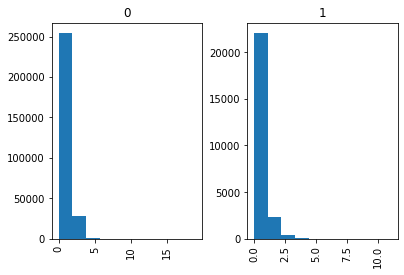

AMT_INCOME_TOTAL


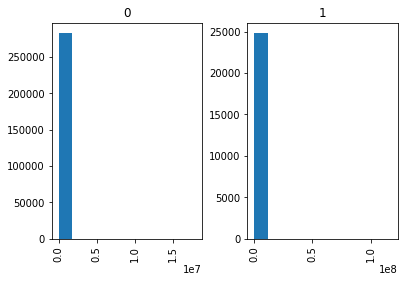

AMT_CREDIT


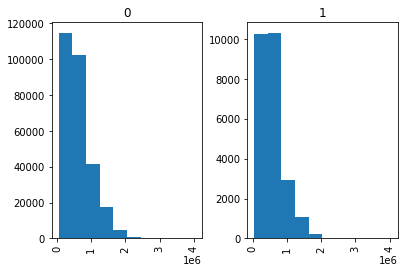

AMT_ANNUITY


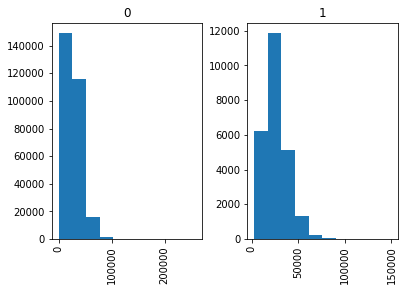

AMT_GOODS_PRICE


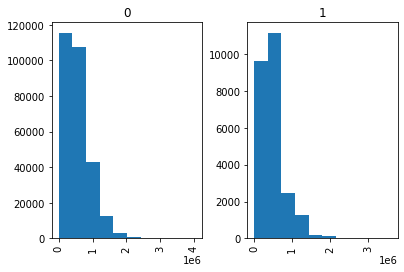

REGION_POPULATION_RELATIVE


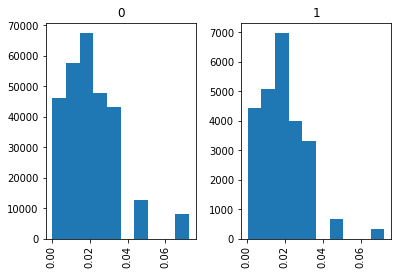

DAYS_BIRTH


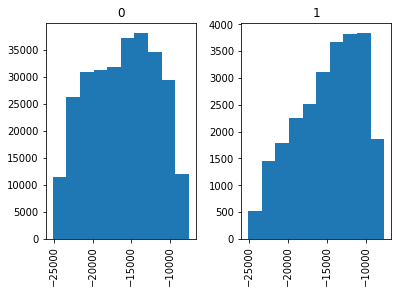

DAYS_EMPLOYED


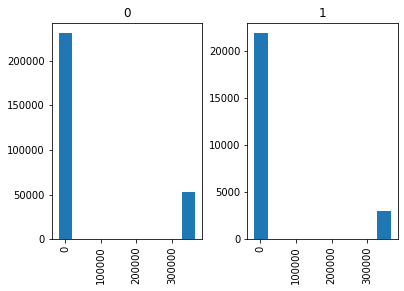

DAYS_REGISTRATION


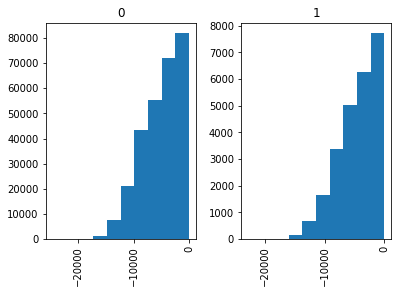

DAYS_ID_PUBLISH


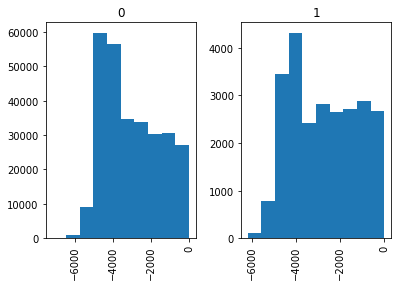

OWN_CAR_AGE


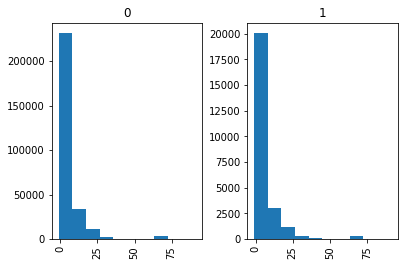

FLAG_MOBIL


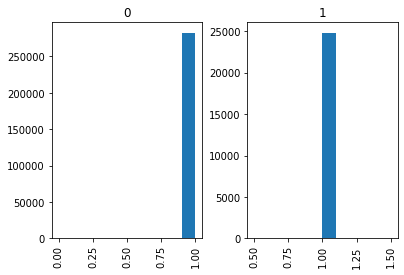

FLAG_EMP_PHONE


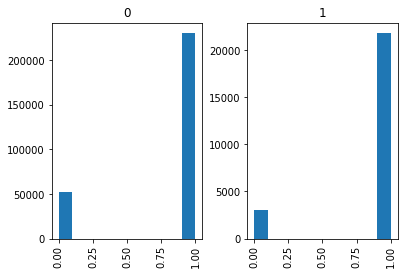

FLAG_WORK_PHONE


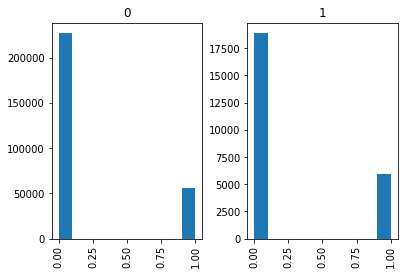

FLAG_CONT_MOBILE


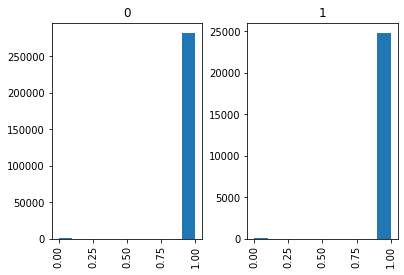

FLAG_PHONE


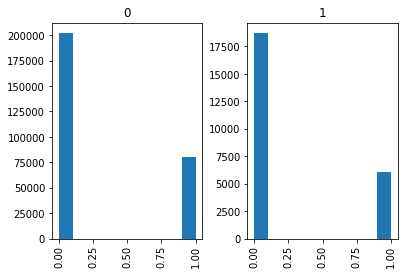

FLAG_EMAIL


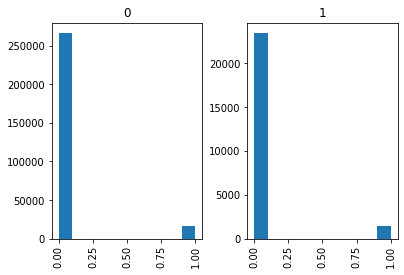

CNT_FAM_MEMBERS


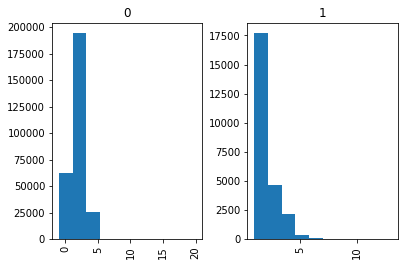

REGION_RATING_CLIENT


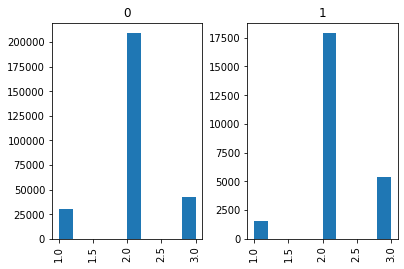

REGION_RATING_CLIENT_W_CITY


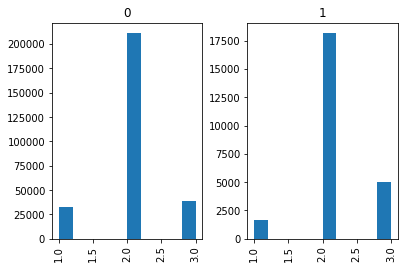

HOUR_APPR_PROCESS_START


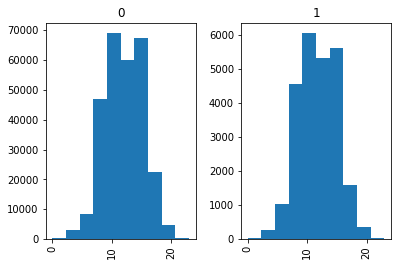

REG_REGION_NOT_LIVE_REGION


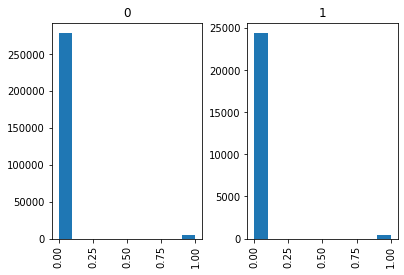

REG_REGION_NOT_WORK_REGION


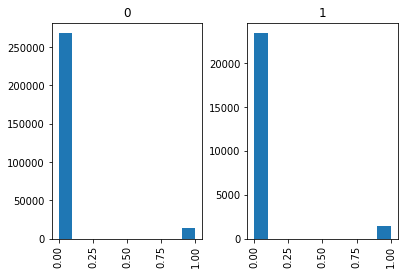

LIVE_REGION_NOT_WORK_REGION


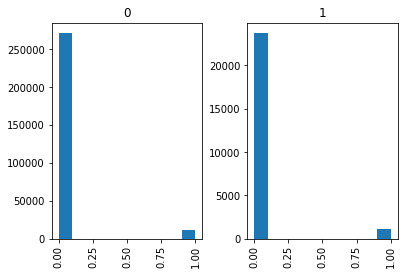

REG_CITY_NOT_LIVE_CITY


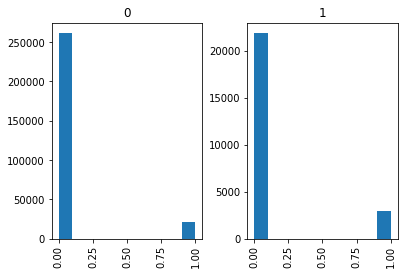

REG_CITY_NOT_WORK_CITY


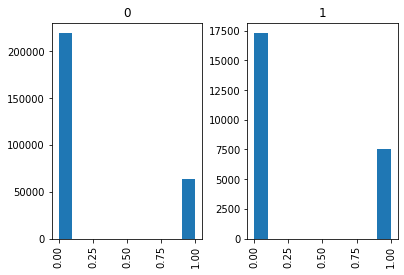

LIVE_CITY_NOT_WORK_CITY


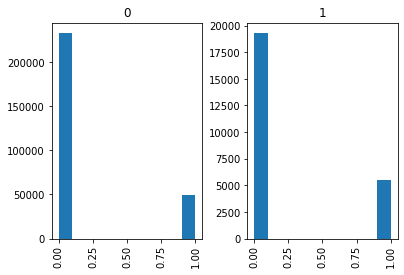

EXT_SOURCE_1


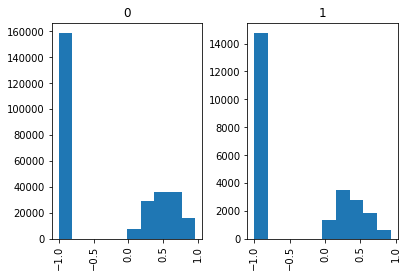

EXT_SOURCE_2


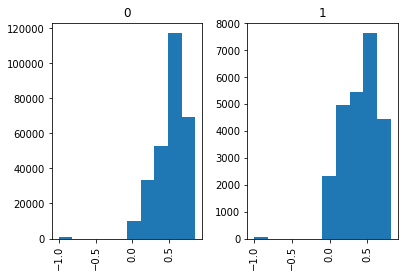

EXT_SOURCE_3


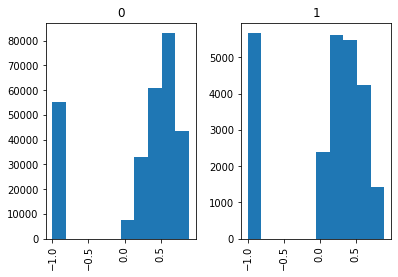

APARTMENTS_AVG


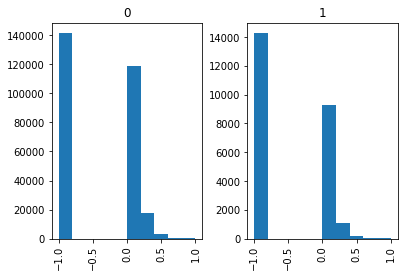

BASEMENTAREA_AVG


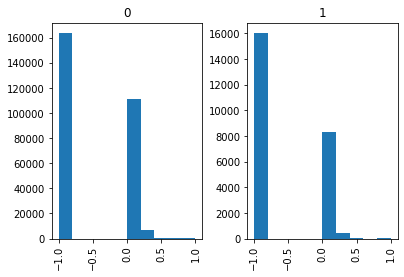

YEARS_BEGINEXPLUATATION_AVG


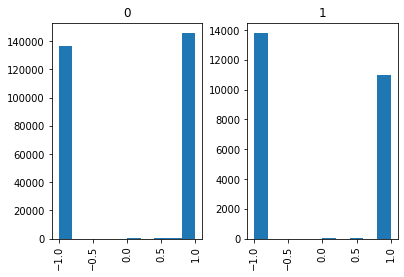

YEARS_BUILD_AVG


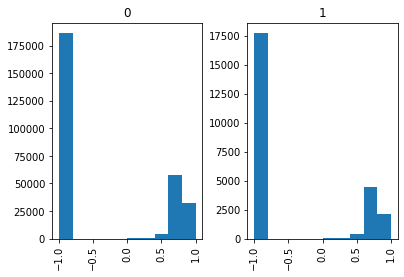

COMMONAREA_AVG


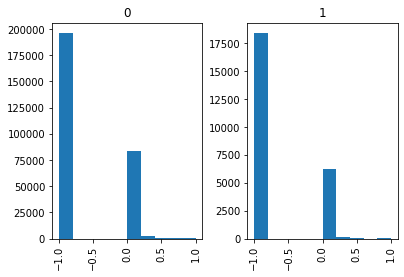

ELEVATORS_AVG


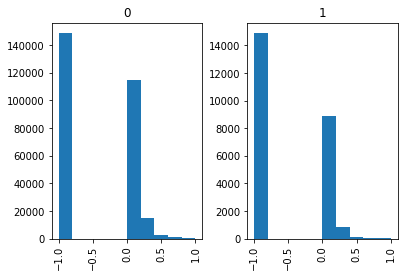

ENTRANCES_AVG


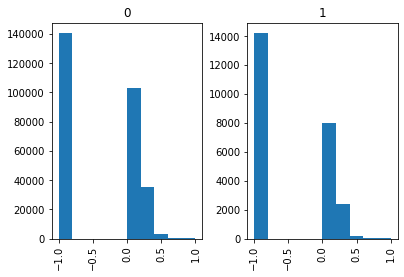

FLOORSMAX_AVG


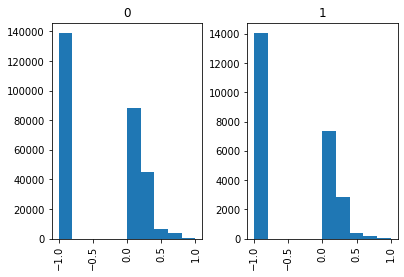

FLOORSMIN_AVG


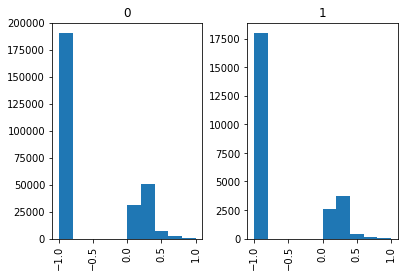

LANDAREA_AVG


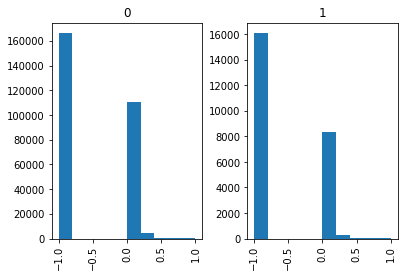

LIVINGAPARTMENTS_AVG


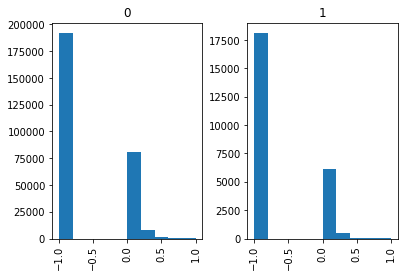

LIVINGAREA_AVG


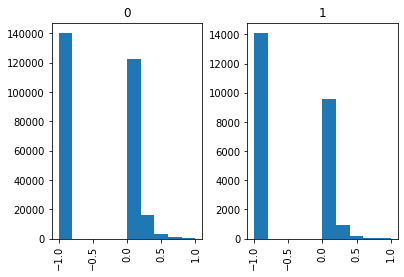

NONLIVINGAPARTMENTS_AVG


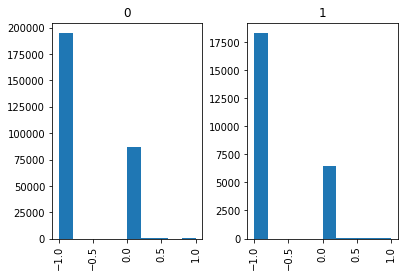

NONLIVINGAREA_AVG


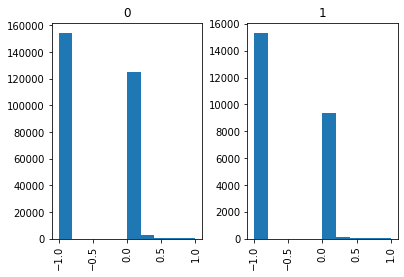

APARTMENTS_MODE


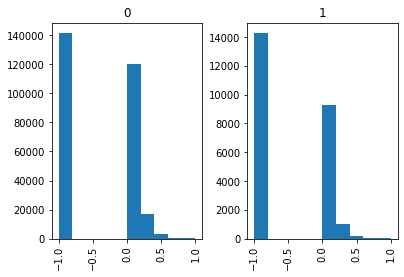

BASEMENTAREA_MODE


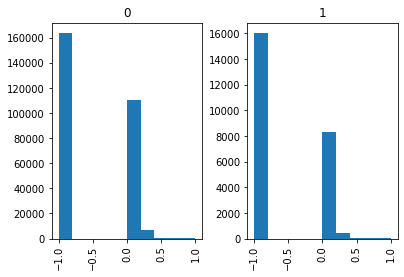

YEARS_BEGINEXPLUATATION_MODE


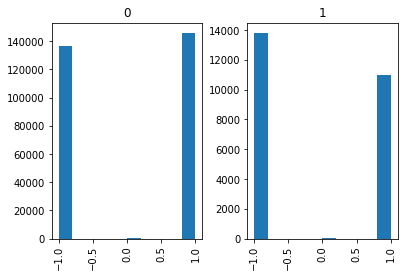

YEARS_BUILD_MODE


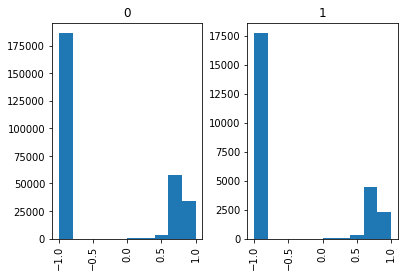

COMMONAREA_MODE


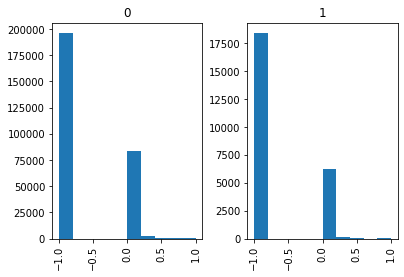

ELEVATORS_MODE


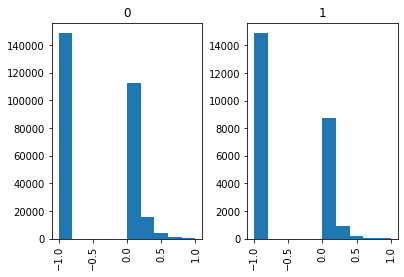

ENTRANCES_MODE


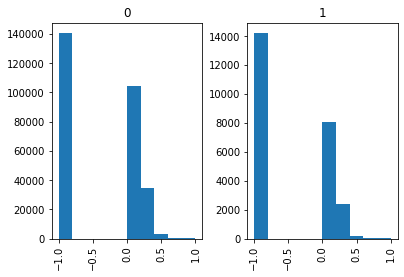

FLOORSMAX_MODE


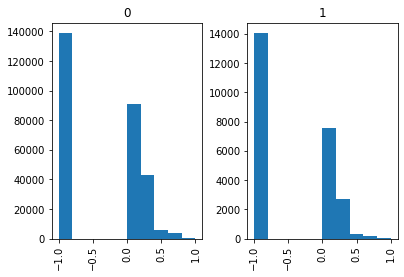

FLOORSMIN_MODE


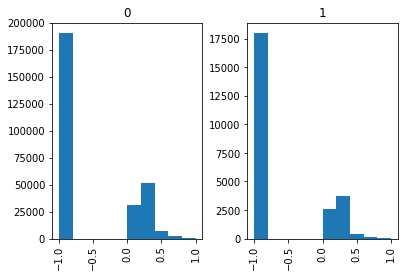

LANDAREA_MODE


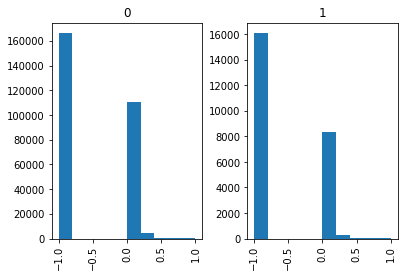

LIVINGAPARTMENTS_MODE


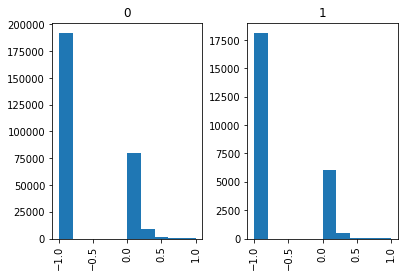

LIVINGAREA_MODE


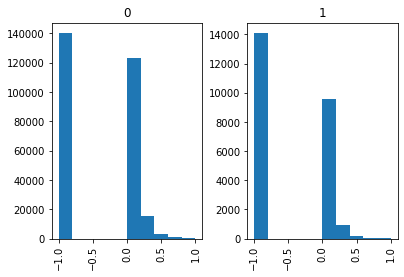

NONLIVINGAPARTMENTS_MODE


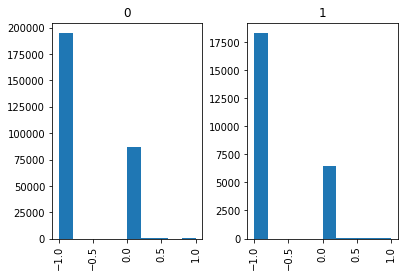

NONLIVINGAREA_MODE


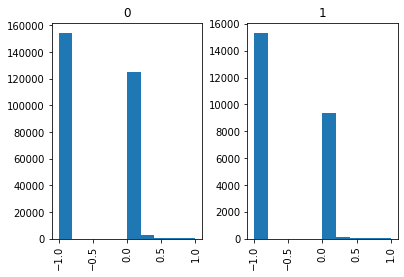

APARTMENTS_MEDI


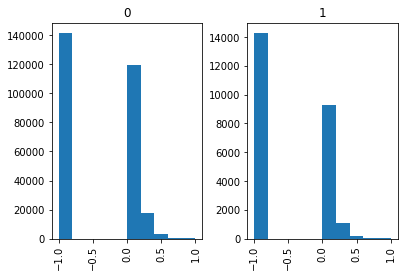

BASEMENTAREA_MEDI


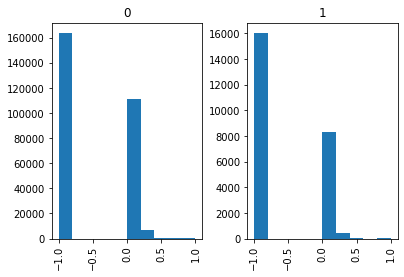

YEARS_BEGINEXPLUATATION_MEDI


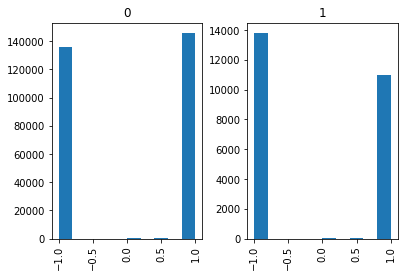

YEARS_BUILD_MEDI


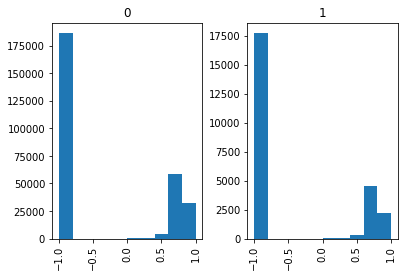

COMMONAREA_MEDI


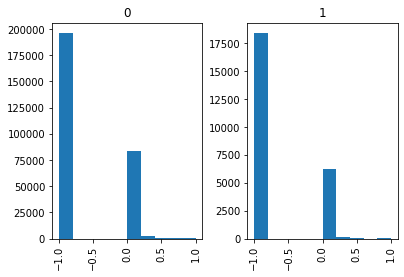

ELEVATORS_MEDI


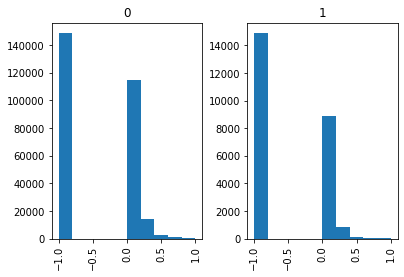

ENTRANCES_MEDI


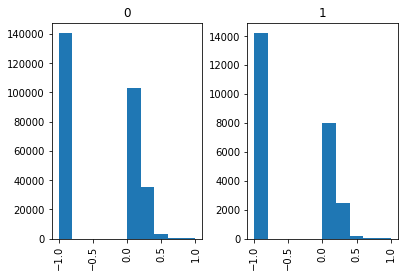

FLOORSMAX_MEDI


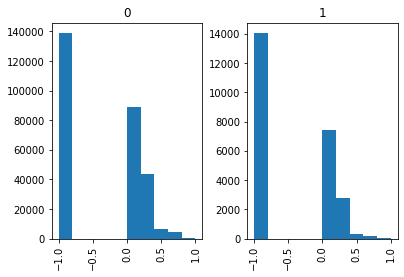

FLOORSMIN_MEDI


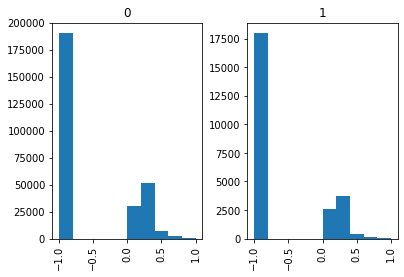

LANDAREA_MEDI


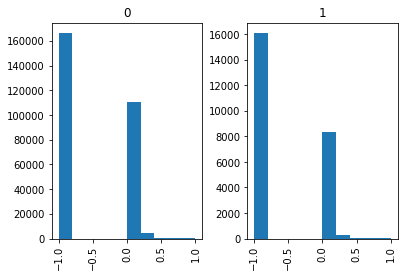

LIVINGAPARTMENTS_MEDI


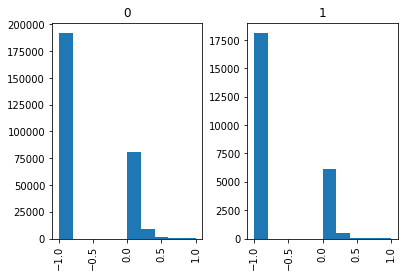

LIVINGAREA_MEDI


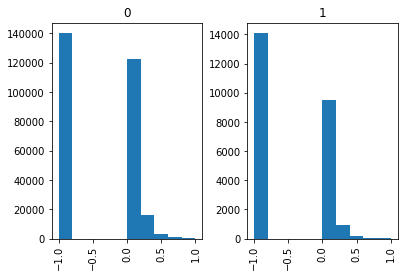

NONLIVINGAPARTMENTS_MEDI


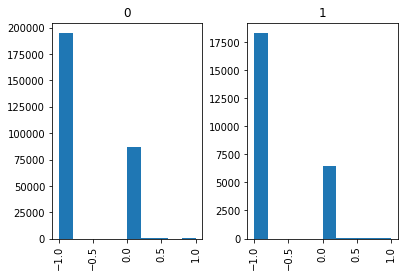

NONLIVINGAREA_MEDI


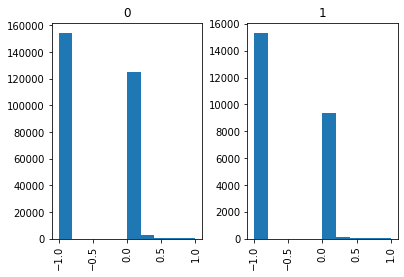

TOTALAREA_MODE


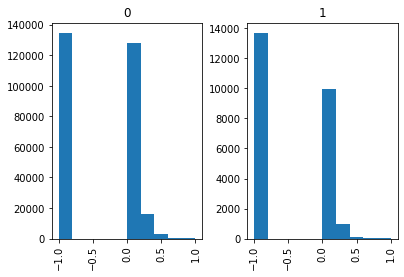

OBS_30_CNT_SOCIAL_CIRCLE


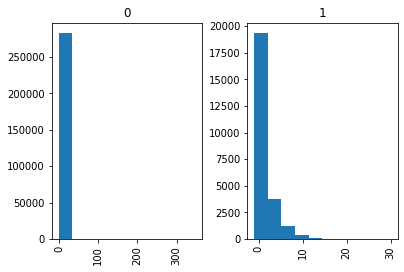

DEF_30_CNT_SOCIAL_CIRCLE


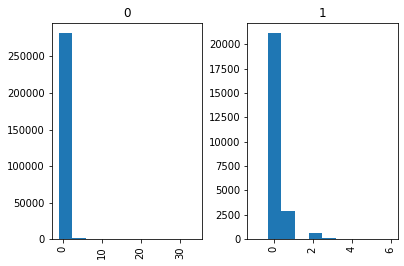

OBS_60_CNT_SOCIAL_CIRCLE


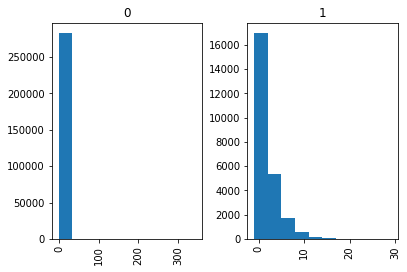

DEF_60_CNT_SOCIAL_CIRCLE


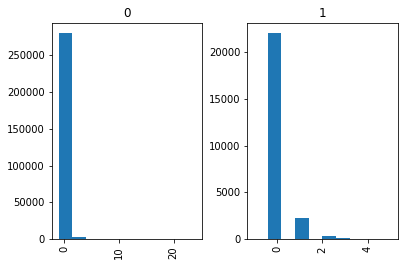

DAYS_LAST_PHONE_CHANGE


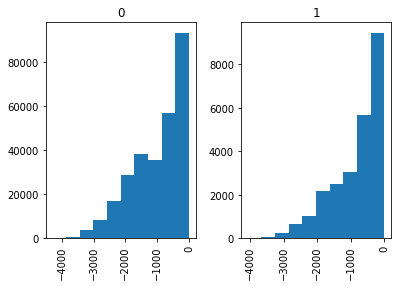

FLAG_DOCUMENT_2


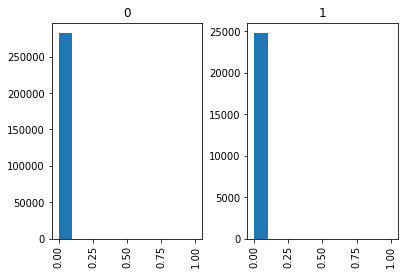

FLAG_DOCUMENT_3


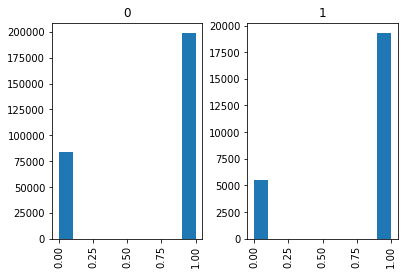

FLAG_DOCUMENT_4


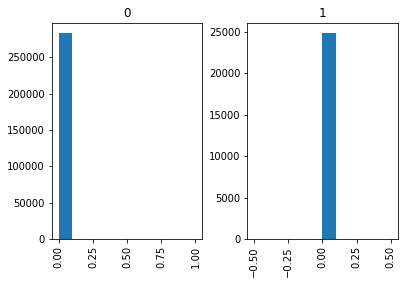

FLAG_DOCUMENT_5


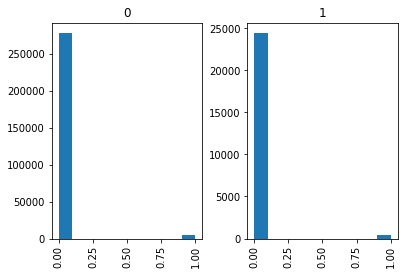

FLAG_DOCUMENT_6


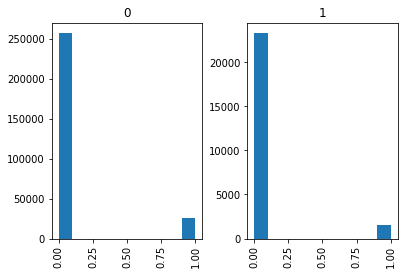

FLAG_DOCUMENT_7


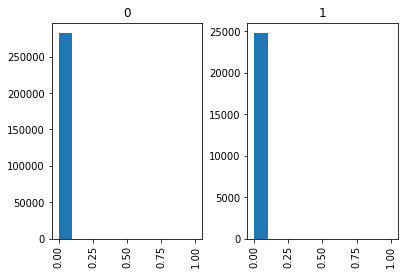

FLAG_DOCUMENT_8


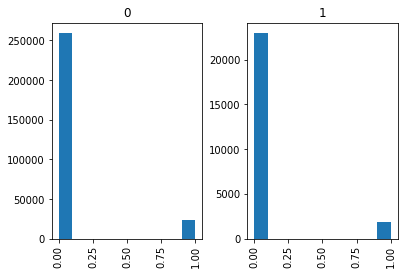

FLAG_DOCUMENT_9


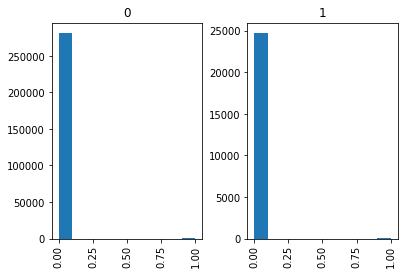

FLAG_DOCUMENT_10


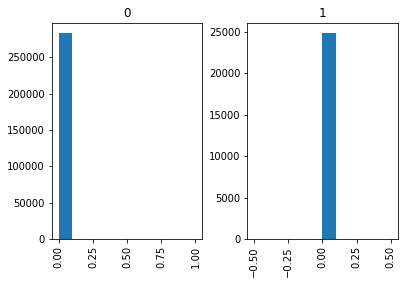

FLAG_DOCUMENT_11


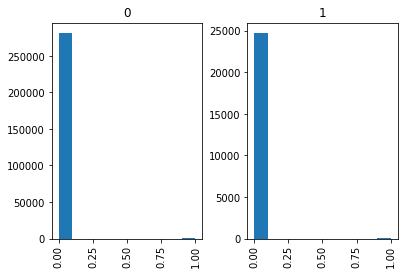

FLAG_DOCUMENT_12


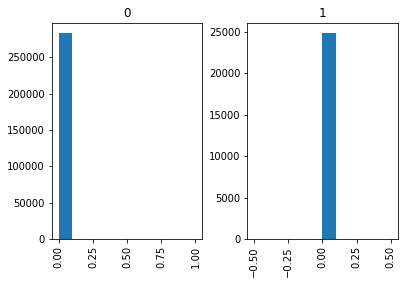

FLAG_DOCUMENT_13


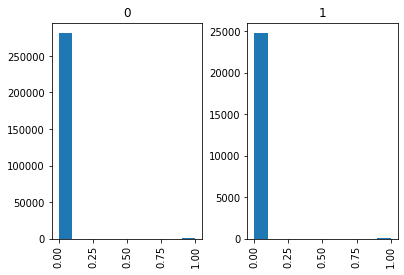

FLAG_DOCUMENT_14


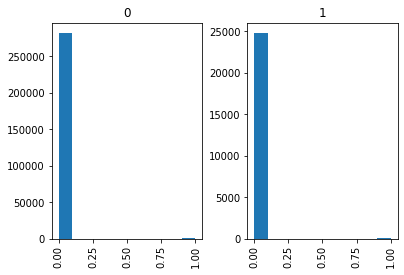

FLAG_DOCUMENT_15


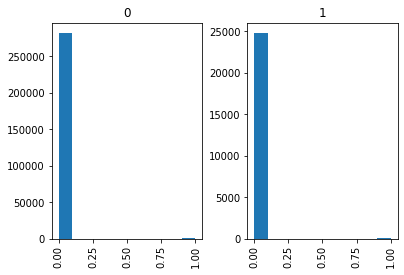

FLAG_DOCUMENT_16


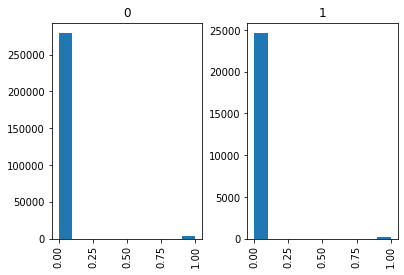

FLAG_DOCUMENT_17


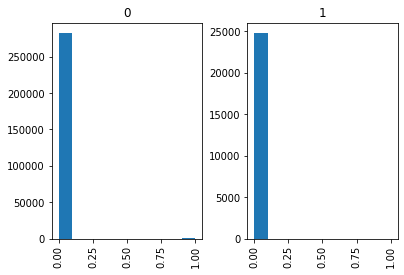

FLAG_DOCUMENT_18


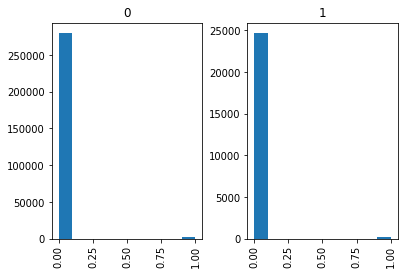

FLAG_DOCUMENT_19


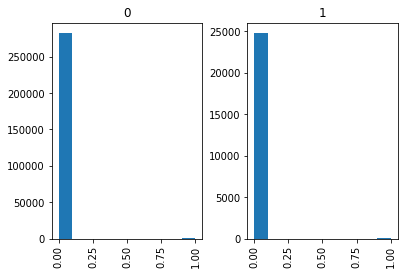

FLAG_DOCUMENT_20


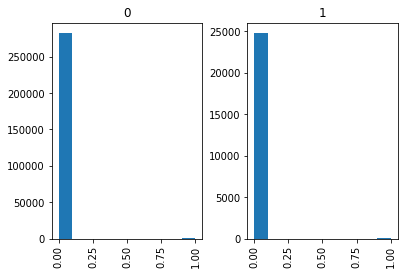

FLAG_DOCUMENT_21


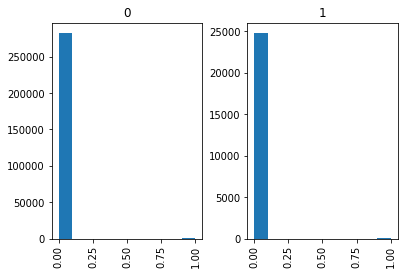

AMT_REQ_CREDIT_BUREAU_HOUR


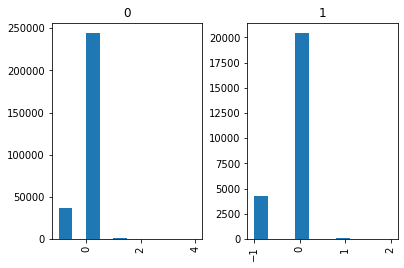

AMT_REQ_CREDIT_BUREAU_DAY


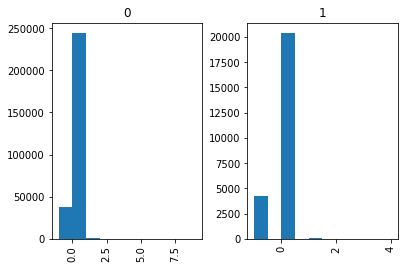

AMT_REQ_CREDIT_BUREAU_WEEK


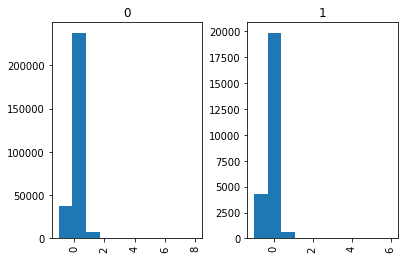

AMT_REQ_CREDIT_BUREAU_MON


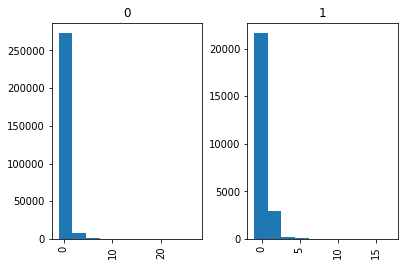

AMT_REQ_CREDIT_BUREAU_QRT


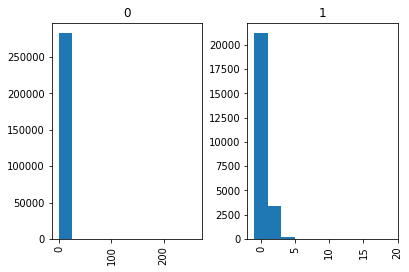

AMT_REQ_CREDIT_BUREAU_YEAR


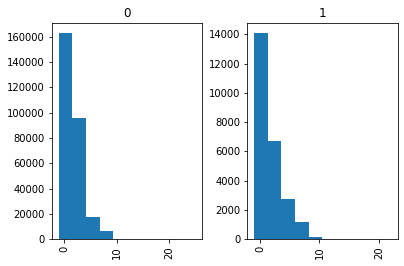

In [6]:
# 数値データの分布
print("0: 返済 1: 遅延 or 返済不可")
for col in df.select_dtypes(exclude="object").columns:
    if col not in ["SK_ID_CURR","TARGET"]:
        print(col)
        hist = df[[col, "TARGET"]].astype({"TARGET": "str"}).fillna({col: -1}).hist(by="TARGET")
        plt.show()

In [8]:
df_corr = df.drop(columns=).corr()
df_corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,-0.002575,0.003042,0.001961,-0.001411,0.001890,0.005245,-0.001058,0.005017,-0.002844,0.004386,0.002081,0.001548,0.003589,0.002156,-0.001923,0.001920,0.001988,-0.001647,0.001366,0.005777,-0.001036,0.005067,-0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,-0.003020,0.002440,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155317,-0.160472,-0.178919,-0.029498,-0.022746,-0.009728,-0.022149,-0.018550,-0.034199,-0.019172,-0.044003,-0.033614,-0.010885,-0.025031,-0.032997,-0.003176,-0.013578,-0.027284,-0.019952,-0.009036,-0.022068,-0.016340,-0.032131,-0.017387,-0.043226,-0.032698,-0.010174,-0.023393,-0.030685,-0.001557,-0.012711,-0.029184,-0.022081,-0.009993,-0.022326,-0.018573,-0.033863,-0.019025,-0.043768,-0.033394,-0.011256,-0.024621,-0.032739,-0.002757,-0.013337,-0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.0000

In [24]:
df_corr["DAYS_EMPLOYED"].sort_values(ascending=False)

DAYS_EMPLOYED                   1.000000
FLAG_DOCUMENT_6                 0.597484
EXT_SOURCE_1                    0.289848
EXT_SOURCE_3                    0.113434
AMT_REQ_CREDIT_BUREAU_YEAR      0.049988
REGION_RATING_CLIENT_W_CITY     0.034624
REGION_RATING_CLIENT            0.032750
OWN_CAR_AGE                     0.028830
DAYS_LAST_PHONE_CHANGE          0.023032
DEF_30_CNT_SOCIAL_CIRCLE        0.016717
AMT_REQ_CREDIT_BUREAU_QRT       0.015345
FLAG_PHONE                      0.015291
DEF_60_CNT_SOCIAL_CIRCLE        0.014211
FLAG_CONT_MOBILE                0.012745
YEARS_BEGINEXPLUATATION_MODE    0.008637
YEARS_BEGINEXPLUATATION_AVG     0.008629
YEARS_BEGINEXPLUATATION_MEDI    0.008405
OBS_60_CNT_SOCIAL_CIRCLE        0.005888
OBS_30_CNT_SOCIAL_CIRCLE        0.005734
ENTRANCES_MODE                  0.004943
ENTRANCES_MEDI                  0.004138
ENTRANCES_AVG                   0.004018
AMT_REQ_CREDIT_BUREAU_WEEK      0.003072
SK_ID_CURR                      0.001366
FLAG_MOBIL      

# 演習

今回は**ロジスティック回帰**縛りでモデリングをしてください。理由としてはLightGBMなどの決定木系アルゴリズムは前処理（スケーリングやカテゴリ変数のエンコーディング、欠損値の取り扱い）が適当でもそこそこの精度を出せるので、最初からこのようなアルゴリズム使ってしまうと練習にならないためです。業務ではガンガン使って大丈夫ですが、基本的な前処理プロセスは機械学習絡んだ仕事するときの教養として知っておいた方が良いです。

そして特徴量エンジニアリングはこの回では気にしないで良いです。モデリングの最初に必ず行うのが**Baselineモデルの作成**です。これはほとんど素のデータ＋最低限の前処理（カテゴリ変数はone hotするとか）で与えられたデータの精度基準を作る目的で行われます。ちゃんとしたBaselineモデルが出来て初めて、自分が追加した特徴量やモデルが予測精度の向上に貢献したかわかります。機械学習はやる事が多く複雑なプロセスなので、「○○をしたから精度が上がった」というのがちゃんと確認できるようにした方が良いです。

## 問1

ピマ・インディアンの例を参考にして２値分類モデルを作成・評価してください。train:valid=8:2にしてvalidのAUCが妥当（0.5以上）ならとりあえず問題ないです。

### 前処理

In [29]:
# 前処理に含めないカラム
ignore_cols = ["SK_ID_CURR", "TARGET"]
# 数値とカテゴリで処理を分けるため
numerical_cols = [k for k,v in df.dtypes.items() if v != np.object and k not in ignore_cols]
categorical_cols = [k for k,v in df.dtypes.items() if v == np.object and k not in ignore_cols]
print(numerical_cols[0:3])
print(categorical_cols[0:3])

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR']


In [30]:
# 欠損値埋めクラス
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, how="median", return_df = True):
        self.cols = cols
        self.how = how
        self.return_df = return_df
        
    def fit(self, X):
        # カラム指定があれば
        if self.cols:
            self.impute_dict = X[self.cols].agg(self.how).to_dict()
        # 無ければ全部のカラム
        else:
            self.impute_dict = X.agg(self.how).to_dict()
        return self
    
    def transform(self, X):
        if self.return_df:
            return X.fillna(self.impute_dict)
        else:
            return X.fillna(self.impute_dict).values

In [31]:
# 標準化をデータフレームとして扱うクラス
class StandardScalerDf(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, return_df = True):
        self.cols = cols
        self.return_df = return_df
        self.ss = StandardScaler()
        
    def fit(self, X):
        if self.cols:
            self.ss.fit(X[self.cols])
        # カラム指定を強要
        else:
            raise ValueError("cols is None")
        return self
    
    def transform(self, X):
        DF = X.copy()
        DF[self.cols] = self.ss.transform(X[self.cols])
        if self.return_df:
            return DF
        else:
            return DF.values

In [33]:
preprocessor = Pipeline(steps=[
    # 数値データ
    # 数値欠損はとりあえず平均値補完
    ("numerical_pp", Imputer(cols=numerical_cols, how="mean")),
    ("ss", StandardScalerDf(cols=numerical_cols)),
    # カテゴリデータ
    ("categorical_ohe", OneHotEncoder(cols=categorical_cols, use_cat_names=True, handle_missing="impute", handle_unknown="ignore"))
    # ("categorical_pp", BinaryEncoder(cols=categorical_cols, handle_missing="impute", handle_unknown="ignore"))
])

In [13]:
X = df_pre.drop(columns=ignore_cols)
y = df_pre.TARGET

# データ分割
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2021, test_size=0.2, stratify=y)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(246008, 260) (61503, 260) (246008,) (61503,)


### 学習

In [15]:
# 学習
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# 評価
pred_train = LogReg.predict_proba(X_train)[:,1]
print("train_auc", roc_auc_score(y_train, pred_train))

train_auc 0.617988798555415


スケーリングしてないためデフォルトのmax_iter=100では、学習が途中まで(最適解に到達していない)の可能性がある => 後で標準化

### 評価

In [16]:
# 予測
pred_val = LogReg.predict_proba(X_val)[:,1]

# 評価
print("val_auc", roc_auc_score(y_val, pred_val))

val_auc 0.6267506027636877


## 問2

問2で作成したモデルで実際にapplication_testを予測し、submitしてみてください。

In [18]:
# 前処理
test_df = pd.read_csv("/Volumes/ex-ssd/kaggle/data/home_default_risk/csv/application_test.csv")
test_df["TARGET"] = 0
test_df_pre = preprocessor.transform(test_df)
test_df_pre.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_nan,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Family,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_nan,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Group of people,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_nan,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_nan,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_HR staff,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_nan,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Industry: t

In [19]:
# 予測
pred_test = LogReg.predict_proba(test_df_pre.drop(columns=["SK_ID_CURR", "TARGET"]))[:,1]
test_df_pre["TARGET"] = pred_test
test_df_pre.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_nan,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,CODE_GENDER_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_nan,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Family,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_nan,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Group of people,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_nan,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_nan,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_nan,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_nan,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_nan,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_HR staff,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_nan,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Industry: t

In [20]:
# 提出ファイル書き出し
test_df_pre[["SK_ID_CURR", "TARGET"]].to_csv("/Volumes/ex-ssd/kaggle/data/home_default_risk/submission.csv", index=None)
pd.read_csv("/Volumes/ex-ssd/kaggle/data/home_default_risk/submission.csv")

,SK_ID_CURR,TARGET
0,100001,0.079850
1,100005,0.087158
2,100013,0.051907
3,100028,0.023904
4,100038,0.064942
...,...,...
48739,456221,0.067002
48740,456222,0.159388
48741,456223,0.088219
48742,456224,0.079704


In [21]:
message = "課題-version1"
!kaggle competitions submit -c home-credit-default-risk -f /Volumes/ex-ssd/kaggle/data/home_default_risk/submission.csv -m $message

100%|███████████████████████████████████████| 1.25M/1.25M [00:06<00:00, 195kB/s]
Successfully submitted to Home Credit Default Risk

## 問3

特徴量選択をしてみましょう。紹介したRFE使ってもいいですし、例えばapplication_train内で50%以上欠損している特徴量は除いて学習する、なども立派な特徴量選択です。

In [31]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False,)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MODE                  0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
LANDAREA_AVG                    0.593767
BASEMENTAREA_MEDI               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_MO

〇〇_AVG, MEDI, MODE系は
1. **解釈しずらい特徴量**(何を平均した何のスコアかが分からない。。)
2. **TARGETで分けた時の分布の違いがほぼない**
3. **欠損が多い**

ため削除！

In [70]:
# 同時に抽出する書き方が分からなかった。。
exclude_cols = \
df.columns[df.columns.str.contains("_AVG", regex=True)].to_list() + \
df.columns[df.columns.str.contains("_MODE", regex=True)].to_list() + \
df.columns[df.columns.str.contains("_MEDI", regex=True)].to_list()
exclude_cols

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NON

↑をconfig.pyのEXCLUDE_COLSに追加

In [16]:
!python src/module/preprocessing.py --csv_name "application_train.csv"

starting
read_csv done
preprocessor fit done
df parquet save done
Preprocessor pickle dump done


In [17]:
!python src/module/train.py --parquet_name "application_train.parquet"

starting
read parquet done
train done
train_auc 0.7481091254269562
val_auc 0.748580978728061
save model done


In [22]:
!python src/module/test.py --csv_name "application_test.csv"

starting
read_csv done
pickle load done
   SK_ID_CURR  ...  CREDIT_TO_GOODS_RATIO
0      100001  ...               1.136825
1      100005  ...               0.923922
2      100013  ...              -0.566401
3      100028  ...              -0.992208
4      100038  ...              -0.992208

[5 rows x 201 columns]
predict done
100%|███████████████████████████████████████| 1.26M/1.26M [00:05<00:00, 225kB/s]
Successfully submitted to Home Credit Default Risksumit done! message: 'submitテスト'


## 問4

余裕のある人はここまでやった処理を.pyにしてみましょう。イメージとしては

- preprocessing.py （前処理）<br>
  scikit-learnに入力できる形まで整形し、そのデータをpickleなどで保存する
- train.py (学習) <br>
  学習したモデルファイルをpickleで保存
- test.py (推論・submitファイル作成) <br>
  学習したモデルファイルを読み込んで予測し、submitファイルを出力
- utils.py （雑多なモジュール）
- config.py (設定周り)

In [37]:
!python src/module/preprocessing.py --csv_name "application_train.csv"

starting
read_csv done
preprocessor fit done
df parquet save done
Preprocessor pickle dump done


In [28]:
!python src/module/train.py --parquet_name "application_train.parquet"

starting
read parquet done
train done
train_auc 0.617988798555415
val_auc 0.6267506027636877
save model done


In [38]:
!python src/module/test.py --csv_name "application_test.csv"

starting
read_csv done
pickle load done
predict done
100%|███████████████████████████████████████| 1.25M/1.25M [00:10<00:00, 121kB/s]
Successfully submitted to Home Credit Default Risk